# Aula 5 - Regressão Logística

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão logística
- 4) Métricas de performance para problemas de classificação

____
____
____

## 1) Introdução

**Problemas de classificação** são aqueles em que queremos determinar a que **categoria ou classe** dentro de um **conjunto discreto de classes** uma dada observação pertence, com base em suas features.

Para isso, construímos um **classificador**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas).

> Principal diferença entre problemas de regressão e classificação:
> - Regressão: valores contínuos;
> - Classificação: valores (classes) discretas (binárias ou não).

No caso de regressão, a hipótese será a equação que determina o target diretamente;

No caso de classificação, a hipótese tem o objetivo de **separar as diferentes classes**. Por isso, muitas vezes utilizamos o termo **fonteira de classificação**, ou **fronteira de decisão**. De um lado da fronteira, temos uma classe; do outro, a outra classe.

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>

<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Problemas de classificação são comumente divididos com relação ao **número de classes** a serem preditas (isto é, com relação à estrutura do espaço de target):

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: $n$ classes (0, 1, ..., $n-1$), com $n > 2 \in \mathbb{N}$

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e importantes classificadores: a **Regressão Logística!**

Antes de conhecermos o método, vamos dar uma rápida olhada na base qual a qual trabalharemos hoje!

__________________

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clickar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clickar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

___
___
___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

np.set_printoptions(suppress=True, precision=3)

Vamos ler a base!

In [3]:
df = pd.read_csv('dados_modelos/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df['Clicked on Ad'].unique()

array([0, 1])

__________

Agora que conhecemos brevemente o problema, vamos conhecer o método de modelagem!

> Nossa discussão será feita toda em cima do problema de **classificação binária**, ou seja, com o espaço de target $\mathcal{Y} = \{0, 1\}$ (as labels 0 e 1 são arbitrárias, e simplesmente diferenciam os dois valores possíveis para o target. Uma outra codificação comum é $\mathcal{Y} = \{-1, +1\}$)

Para o caso multiclasse, há algumas anterações nos fundamentos dos métodos, mas, na prática, a implementação será direta, então não precisamos nos preocupar!

___
___
___

## 2) Regressão Logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um método que aplicaremos a problemas de classificação!

O objetivo da regressão logística é: **modelar a probabilidade $P(\vec{x})$ de dada observação (com features $\vec{x}$) pertencer a uma das classes (que comumente chamamos de classe 1)**, ou seja, queremos modelar:

$$ P( y = 1 | \vec{x}) $$

Naturalmente, $0 \le P(\vec{x}) \le 1$. 

> Lembre-se que: $ P( y = 0 | \vec{x}) = 1 - P( y = 1 | \vec{x}) $

Uma vez que tivermos uma função que modele a probabilidade acima, podemos tomar a decisão de classificação da seguinte maneira:

- $P(\vec{x}) \ge 0,5$: x pertence à classe 1
- $P(\vec{x}) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora o default fixá-lo em 50%!

> É justamente através do cutoff que tomamos uma decisão discreta (classificação) a partir de um método de regressão!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
</figure> 

Um exemplo de tal função é a **função logística** ou **função sigmoidal**:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note que:

- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = b_0 + b_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">

No nosso caso, como queremos modelar probabilidades, a função acima é exatamente a **hipótese** do estimador de regressão logística! Isto é,

$$f_{H, \vec{b}}(x) = P(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

Ou, para a regressão logística múltipla com $p$ features $\vec{x} = x_1, \cdots, x_p$:

$$f_{H, \vec{b}}(\vec{x}) = P(\vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

No fim, temos que a predição é tomada em termos do cutoff $\alpha$, e, com isso, chegamos no $\hat{y}$:

$$\hat{y} = \left\{\begin{matrix}
1, \text{se } P(\vec{x}) \geq \alpha\\  
0, \text{se } P(\vec{x}) < \alpha
\end{matrix}\right.$$

Note, portanto, que apesar da hipótese ser uma função não linear, **a fronteira de decisão** é linear, sendo definida pela função por partes acima, com base no cutoff e na probabilidade!

Com um pouco de álgebra, é possível mostrar que: 

$ b_0 + b_1 x_1 + \cdots + b_p x_p = \log \left ( \frac{P}{1-P} \right ) $

A quantidade $\frac{P}{1-P}$ é conhecida como **odds/chance**; e $\log \left ( \frac{P}{1-P} \right )$ é o [log-odds ou logit](https://en.wikipedia.org/wiki/Logit).

Note, portanto, que podemos entender a regressão logística como um modelo em que **o logit é linear com as features**. 

> Portanto, esse fato e o anterior fazem com que, de fato, a regressão logística seja um **um modelo linear**.

Na regressão logística, nosso conjunto de hipóteses é: $\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.

O objetivo do algoritmo de aprendizagem será, como sempre, determinar qual é o vetor de parâmetros $\vec{b}$ que produz uma função logística que **melhor se ajusta aos dados**.

Para ilustrar este ponto novamente, vamos produzir a seguir algumas das infinitas funções de $\mathcal{H}$:

In [5]:
def hip_lin(x, b0, b1):
    return b0 + b1*x

In [6]:
def sig(z):
    return  1 / (1 + np.exp(-z))

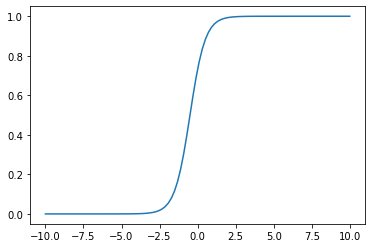

In [7]:
b0 = 1
b1 = 2

x = np.linspace(-10, 10, 100)

y_lin = hip_lin(x, b0, b1)

y_sig = sig(y_lin)

plt.plot(x, y_sig)

Com a biblioteca [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) podemos fazer plots interativos super legais!

In [8]:
import ipywidgets as widgets

In [10]:
def reg_log_widget(b0=1, b1=1):
    y_sig = sig(hip_lin(x, b0, b1))
    plt.plot(x, y_sig)

In [11]:
widgets.interact(reg_log_widget, b0=(-2, 2, 0.1), b1=(-2, 2, 0.1))

interactive(children=(FloatSlider(value=1.0, description='b0', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.reg_log_widget(b0=1, b1=1)>

___

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 

Para maiores detalhes sobre o algoritmo de aprendizagem, veja [este vídeo](https://youtu.be/yIYKR4sgzI8) e [esta série de vídeos](https://youtu.be/vN5cNN2-HWE), do ótimo canal StatQuest!


_________

Vamos analisar um pouco mais nosso dataset de marketing...

In [13]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Aqui novamente, vamos considerar apenas as colunas numéricas como features. 

Sigamos com o train-test split!

In [14]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [15]:
df_model = df.select_dtypes(include=np.number)

In [16]:
X = df_model.drop(columns='Clicked on Ad')
y = df_model['Clicked on Ad']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Quando fizermos a EDA de um problema de classificação, é muito útil utilizar o target para analisar a **separabilidade** das classes! 

Para este fim, basta usarmos o argumento `hue` das funções do seaborn!

In [19]:
df_temp = pd.concat([X_train, y_train], axis=1)
df_temp.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
29,76.020,22,46179.970,209.820,0,0
535,78.760,32,70012.830,208.020,1,0
695,73.490,38,67132.460,244.230,0,0
557,79.670,28,58576.120,226.790,0,0
836,49.210,46,49206.400,115.600,0,1


O `pairplot` é uma ferramente legal para visualizarmos nossos dados projetados ao subspaço de cada par de features:

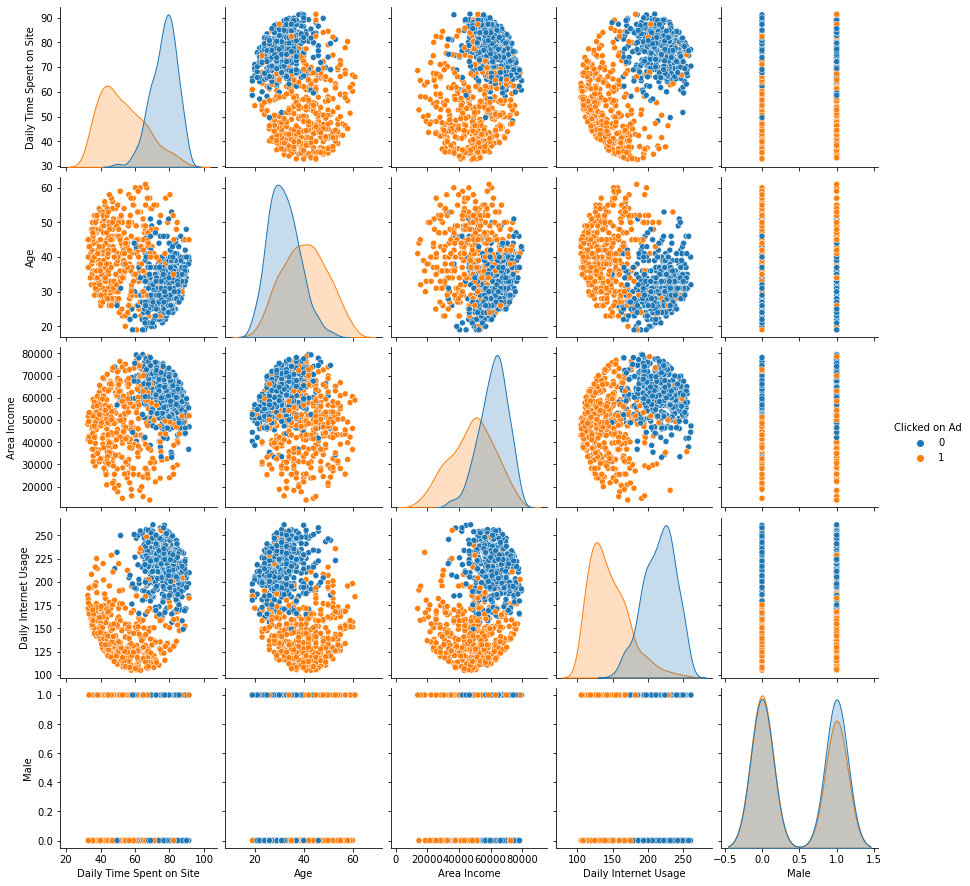

In [20]:
sns.pairplot(data=df_temp, hue='Clicked on Ad')

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

Vamos começar a construir o modelo?

In [21]:
from sklearn.linear_model import LogisticRegression

estimador = LogisticRegression()

estimador.fit(X_train, y_train)

LogisticRegression()

__Modelo treinado!__

$$f_{H, \vec{b}}(\vec{x}) = P(y=1 | \vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

Vamos ver os parâmetros do modelo:

In [22]:
estimador.intercept_

array([0.006])

In [23]:
estimador.feature_names_in_

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'], dtype=object)

In [24]:
estimador.coef_

array([[-0.056,  0.262, -0.   , -0.027,  0.002]])

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($b_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($b_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

______
_____
_____
____

In [25]:
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
521,63.260,29,54787.370,120.460,1
737,71.230,52,41521.280,122.590,0
740,43.630,38,61757.120,135.250,1
660,42.040,49,67323.000,182.110,0
411,78.680,29,66225.720,208.050,0


In [26]:
y_test.head()

521    1
737    1
740    1
660    1
411    0
Name: Clicked on Ad, dtype: int64

In [27]:
estimador.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn proporciona é o método `predict_proba()`

Esse método retorna exatamente qual é a **probabilidade modelada pelo logit**, isto é, $P(y=1 | \vec{x})$.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o cutoff de escolha de classe** para ser algo diferente de 0.5!


In [28]:
proba_1 = estimador.predict_proba(X_test)[:,1]
proba_1

array([0.498, 0.997, 0.95 , 0.99 , 0.032, 0.289, 0.025, 0.99 , 0.313,
       0.947, 0.02 , 0.908, 0.997, 0.026, 0.917, 0.993, 0.999, 0.967,
       0.098, 0.99 , 0.097, 0.986, 0.994, 0.016, 0.022, 0.995, 0.009,
       0.016, 0.99 , 0.732, 0.018, 0.672, 0.038, 0.857, 0.998, 0.075,
       0.026, 0.117, 0.862, 0.978, 0.016, 0.916, 0.025, 0.983, 0.014,
       0.104, 0.992, 0.998, 0.025, 0.997, 0.979, 0.009, 0.883, 0.013,
       0.116, 0.07 , 0.141, 0.998, 0.027, 0.96 , 0.082, 0.991, 0.114,
       0.97 , 0.877, 0.973, 0.998, 0.067, 0.707, 0.949, 0.972, 0.505,
       0.133, 0.054, 0.842, 0.068, 0.037, 0.963, 0.496, 0.069, 0.989,
       0.964, 0.576, 0.556, 0.08 , 0.043, 0.021, 0.006, 0.088, 0.041,
       0.092, 0.222, 0.072, 0.902, 0.23 , 0.034, 0.999, 0.891, 0.102,
       0.031, 0.916, 0.01 , 0.992, 0.035, 0.996, 0.509, 0.865, 0.403,
       0.985, 0.048, 0.998, 0.061, 0.958, 0.995, 0.195, 0.52 , 0.025,
       0.154, 0.046, 0.467, 0.902, 0.968, 0.999, 0.027, 0.238, 0.029,
       0.534, 0.031,

In [29]:
cutoff = 0.1

np.where(proba_1 >= cutoff, 1, 0 )

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

## 3) Métricas de performance para problemas de classificação

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:

<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">

> **IMPORTANTE**: dependendo da implementação/referência, a ordem das linhas/colunas pode mudar, então se atente a isso quando for interpretar a matriz de confusão!

No Sklearn, a convenção é a seguinte:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Além disso, temos as seguintes métricas numéricas de avaliação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

Descrição da imagem: 

> tudo o que tá no lado esquerdo é a classe real positiva (y = 1); do lado direito, real negativa (y = 0);

> tudo o que tá dentro do circulo predita positiva ($\hat{y} = 1$); fora do circulo, predita negativa ($\hat{y} =0$)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=400>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, uma métrica que em muitos casos é interessante de ser otimizada é o F1! 

<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" width=500>

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

_______

Um ponto muito importante é que o método `predict()` se utiliza do cutoff igual a 0.5 para tomar a decisão! Veremos mais detalhes sobre isso mais a frente. Por enquanto, vamos seguir com a avaliação do modelo com este cutoff padrão!

In [31]:
proba_1 = estimador.predict_proba(X_test)[:, 1]
cutoff = 0.5

y_pred = np.where(proba_1 >= cutoff, 1, 0)

y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibilica estas funcionalidades! Vejamos algumas delas!

In [29]:
from sklearn.metrics import confusion_matrix

matrix_confusao = confusion_matrix(y_test, y_pred)
print(matrix_confusao)
print(matrix_confusao[0][0])
print(matrix_confusao[0][1])

[[85  4]
 [16 95]]
85
4


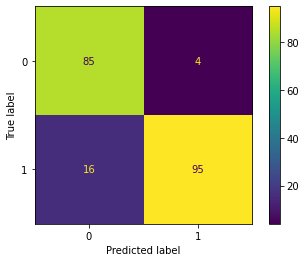

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

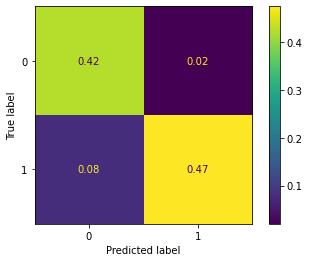

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

_________________

Vamos avaliar diferentes cutoffs...

In [35]:
def precision_recall_widgets(cutoff=0.5):
    proba_1 = estimador.predict_proba(X_test)[:, 1]

    y_pred = np.where(proba_1 >= cutoff, 1, 0)
    y_pred
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    df = pd.DataFrame(report).round(2)
    
    plt.figure(figsize=(10,5))
    plt.table(cellText=df.values, colLabels=df.columns, loc='center')
    

In [36]:
widgets.interact(precision_recall_widgets, cutoff=(0.1, 0.9, 0.01))

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=0.9, min=0.1, step=0.01), Output()), _d…

<function __main__.precision_recall_widgets(cutoff=0.5)>

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

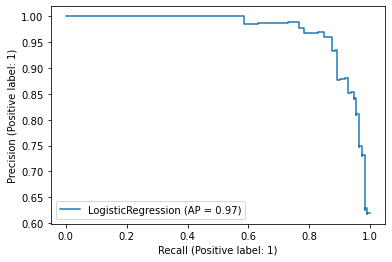

In [38]:
PrecisionRecallDisplay.from_estimator(estimator=estimador, X=X_test, y=y_test, pos_label=1)

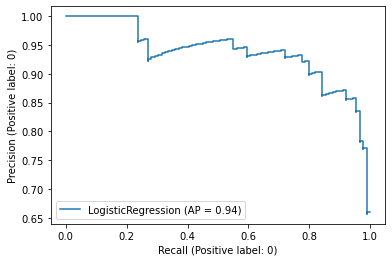

In [39]:
PrecisionRecallDisplay.from_estimator(estimator=estimador, X=X_test, y=y_test, pos_label=0)

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, cutoffs= precision_recall_curve(y_test, proba_1)

Text(0.5, 0, 'Cutoffs')

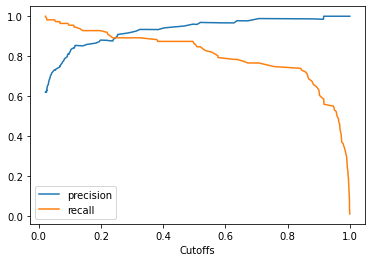

In [41]:
plt.plot(cutoffs, precisions[:-1], label='precision')
plt.plot(cutoffs, recalls[:-1], label='recall')

plt.legend()

plt.xlabel('Cutoffs')

_________

### Tradeoff precision/recall

Conforme é possível ver acima, claramente há um **tradeoff** entre precision e recall conforme variamos o cutoff. Isso faz total sentido, dado que estas métricas representam!

Podemos visualizar este tradeoff facilmente com o sklearn:

In [42]:
np.where(precisions == recalls)

(array([68]),)

In [45]:
cutoffs[68]

0.24691226374920247

In [46]:
precisions[89], recalls[89]

(0.9666666666666667, 0.7837837837837838)

Text(0.5, 0, 'Cutoffs')

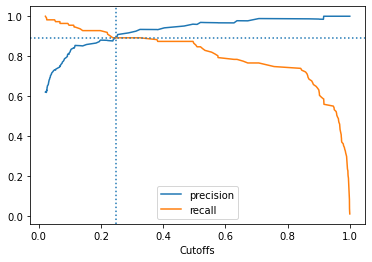

In [48]:
plt.plot(cutoffs, precisions[:-1], label='precision')
plt.plot(cutoffs, recalls[:-1], label='recall')

plt.axvline(cutoffs[np.where(precisions == recalls)], ls=':')
plt.axhline(precisions[np.where(precisions == recalls)], ls=':')

plt.legend()

plt.xlabel('Cutoffs')